# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [51]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [9]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [10]:
html

'<html lang="en"><head>\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <meta name="description" content="">\n  <title>Mars Temperature Data</title>\n\n  <link rel="stylesheet" type="text/css" href="css/bootstrap.min.5.2.2.css">\n  <link rel="stylesheet" type="text/css" href="css/temp.css">\n</head>\n\n<body>\n\n  <main>\n    <div class="container py-4">\n      <header class="pb-3 mb-4 border-bottom">\n        <a href="/" class="d-flex align-items-center text-dark text-decoration-none">\n          <span class="fs-4">Mission To Mars</span>\n        </a>\n      </header>\n\n      <div class="p-5 mb-4 bg-light rounded-3">\n        <div class="container-fluid py-5">\n          <h1 class="display-5 fw-bold">Mars Temperature Data</h1>\n          <p class="col-md-8 fs-4">This is Mars data.</p>\n\n          <table class="table">\n            <tbody><tr>\n              <th>id</th>\n              <th>terrestrial_date</th>\n              <th>so

In [15]:
# Extract all rows of data
data_rows = soup.find_all("tr", class_="data-row")

In [16]:
data_rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
# Create an empty list
# Loop through the scraped data to create a list of rows
data = []
for row in soup.find_all('tr'):
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text)
    data.append(row_data)

print(data)

[[], ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], [

In [29]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'] )

In [ ]:
# drop the first row, which is empty
df = df.drop(0)

In [33]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [21]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [34]:
# Change data types for data analysis
df["id"]= pd.to_numeric(df["id"])
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
df["sol"] = pd.to_numeric(df["sol"])
df["ls"] = pd.to_numeric(df["ls"])
df["month"] = pd.to_numeric(df["month"])
df["min_temp"] = pd.to_numeric(df["min_temp"])
df["pressure"] = pd.to_numeric(df["pressure"])


In [35]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [50]:
# 1. How many months are there on Mars?
month = df['month'].max()
print(f"There are {month} months are there on Mars")

There are 12 months are there on Mars


In [37]:
# 2. How many Martian days' worth of data are there?
num_sols = df['sol'].nunique()
print(f"Total number of Martian days' worth of data: {num_sols}")

Total number of Martian days' worth of data: 1867


In [38]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = df.groupby('month')['min_temp'].mean()

print(avg_low_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [64]:
print(df.columns)

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')


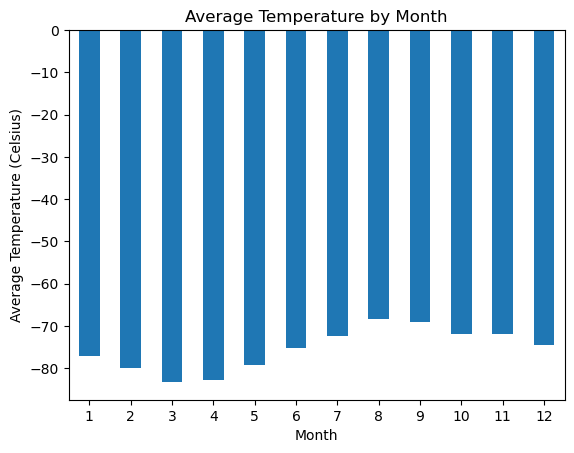

In [46]:
# Plot the average low temperature by month

avg_low_temp_by_month.plot.bar(rot =0)

# Add labels and title to the chart
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.title('Average Temperature by Month')

# Show the chart
plt.show()

Month #8 had the hottest average temperature of -68.38297872340425
Month #3 had the coldest average temperature of -83.30729166666667


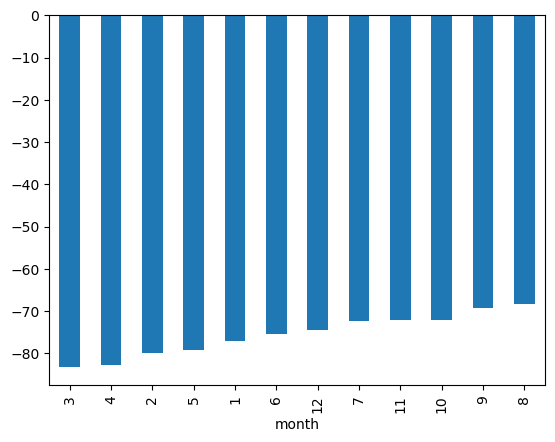

In [42]:
# Identify the coldest and hottest months in Curiosity's location

hottest_month = avg_low_temp_by_month.idxmax()
hottest_month_temp = avg_low_temp_by_month.max()
coldest_month = avg_low_temp_by_month.idxmin()
coldest_month_temp = avg_low_temp_by_month.min()
print(f"Month #{hottest_month} had the hottest average temperature of {hottest_month_temp}")
print(f"Month #{coldest_month} had the coldest average temperature of {coldest_month_temp}")

avg_low_temp_by_month.sort_values().plot(kind="bar")
plt.show()

In [69]:
print(df['pressure'].unique()) 

[739. 740. 741. 732. 742. 743. 745. 747. 748. 749. 750. 751. 753. 754.
 756. 757. 758. 759. 761. 762. 764. 766. 768. 769. 771. 772. 774. 775.
 776. 777. 778. 780. 781. 783. 784. 785. 788. 790. 791. 792. 793. 795.
 796. 798. 799. 801. 805. 808. 811. 813. 817. 820. 819. 822. 826. 828.
 829. 830. 833. 836. 838. 839. 841. 844. 845. 848. 849. 852. 857. 859.
 861. 864. 866. 867. 869. 875. 876. 880. 884. 883. 886. 888. 889. 890.
 891. 893. 894. 897. 896. 899. 903. 904. 906. 908. 907. 909. 914. 912.
 913. 915. 917. 922. 920. 918. 919. 923. 925. 921. 916. 895. 892. 885.
 881. 878. 879. 873. 877. 874. 871. 868. 863. 860. 858. 855. 856. 854.
 853. 850. 847. 851. 846. 862. 865. 870. 872. 882. 887. 898. 900. 901.
 905. 902. 843. 842. 840. 835. 834. 831. 827. 825. 823. 821. 816. 815.
 812. 810. 807. 806. 804. 802. 797. 787. 782. 779. 773. 765. 763. 760.
 755. 752. 746. 744. 738. 735. 734. 736. 737. 770. 786. 789. 794. 800.
 809. 814. 824. 910. 911. 924. 832. 837. 818. 803. 767. 733. 731. 730.
 729. 

In [44]:
# 4. Average pressure by Martian month
avg_pressure_monthly = df["pressure"].groupby(df["month"]).mean()
avg_pressure_monthly

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0.5, 1.0, 'Average Pressure by month')

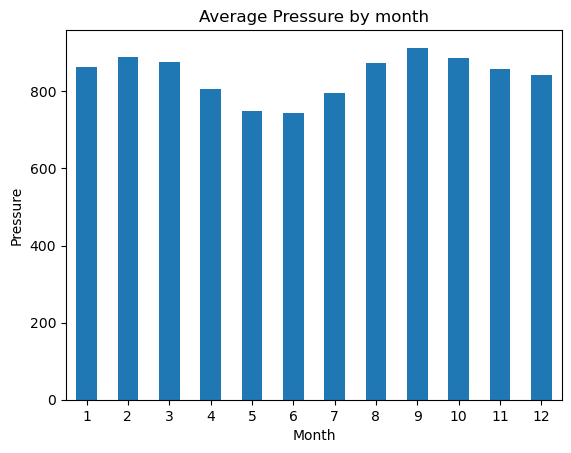

In [45]:
# Plot the average pressure by month
avg_pressure_monthly.plot.bar(rot=0)
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.title('Average Pressure by month')

In [47]:
# extract lowest and hiest pressure from the above list
highest_pressure_month = avg_pressure_monthly.idxmax()
highest_month_pressure = avg_pressure_monthly.max()
lowest_pressure_month = avg_pressure_monthly.idxmin()
lowest_month_pressure = avg_pressure_monthly.min()

print(f"Month #{highest_pressure_month} had the highest average pressure in mmHG of {highest_month_pressure}")
print(f"Month #{lowest_pressure_month} had the lowest average pressure in mmHG of {lowest_month_pressure}")

Month #9 had the highest average pressure in mmHG of 913.3059701492538
Month #6 had the lowest average pressure in mmHG of 745.0544217687075


In [52]:
# 5. How many terrestrial (earth) days are there in a Martian year?

mars_earth_day = df.set_index("terrestrial_date")
mars_earth_day

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2012-08-16,2,10,155,6,-75.0,739.0
2012-08-17,13,11,156,6,-76.0,740.0
2012-08-18,24,12,156,6,-76.0,741.0
2012-08-19,35,13,157,6,-74.0,732.0
2012-08-20,46,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
2018-02-23,1889,1973,133,5,-78.0,730.0
2018-02-24,1892,1974,134,5,-77.0,729.0
2018-02-25,1894,1975,134,5,-76.0,729.0


In [55]:
# find all the ls = 0 dates
# This will give us the dates at which Mars is at Longitude 0 with regard to the sun
# i.e. the beginning of an orbit around the sun

ls_0_list = mars_earth_day.loc[mars_earth_day["ls"] == 0]
ls_0_list

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2013-08-01,320,351,0,1,-75.0,853.0
2013-08-02,319,352,0,1,-77.0,854.0
2015-06-19,954,1019,0,1,-81.0,849.0
2015-06-20,938,1020,0,1,-63.0,832.0
2017-05-06,1606,1688,0,1,-76.0,840.0
2017-05-07,1610,1689,0,1,-75.0,840.0


In [56]:
# Taking the list at longitude 359 will give us the dates right before a complete circuit around the sun for Mars
# A Complete circle is 360 degrees, so this estimate might be off by a small fraction
ls_359_list = mars_earth_day.loc[mars_earth_day["ls"] == 359]
ls_359_list

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2013-07-30,316,349,359,12,-75.0,852.0
2013-07-31,318,350,359,12,-76.0,853.0
2015-06-17,955,1017,359,12,-78.0,850.0
2015-06-18,956,1018,359,12,-79.0,850.0
2017-05-04,1607,1686,359,12,-75.0,838.0
2017-05-05,1608,1687,359,12,-75.0,838.0


In [57]:
# one mars year is the amount of time it takes for longtitude to go from 0 to 359
# Completing one revolution
date_359 = '2015-06-17'
date_359_val = datetime.datetime.strptime(date_359, "%Y-%m-%d")
date_359_val

datetime.datetime(2015, 6, 17, 0, 0)

In [58]:
# Date at which longitude = 0
date_0 = '2013-08-01'
date_0_val = datetime.datetime.strptime(date_0, "%Y-%m-%d")
date_0_val

datetime.datetime(2013, 8, 1, 0, 0)

In [59]:
# Now we can answer how many Earth days in a Martian year
mars_year_days = date_359_val-date_0_val
print(f"One Mars year is ({mars_year_days}) Earth Days")

One Mars year is (685 days, 0:00:00) Earth Days


Text(0.5, 1.0, 'Daily minimum temperature')

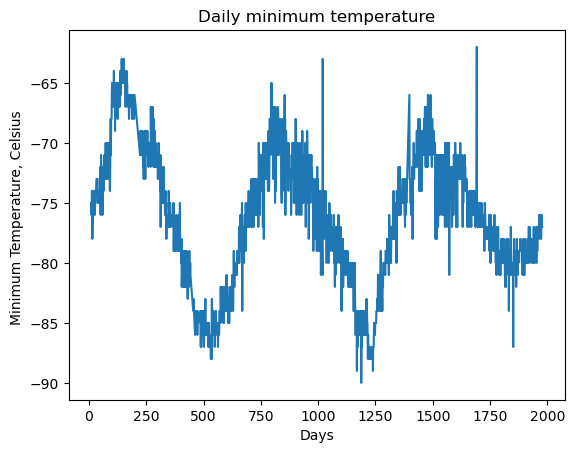

In [60]:
# plot to visualize what we have calculated 
# plot shows the cyclical temperatures as Mars revolves around the sun 
# Another way of inferring the length of a Mars year in terrestrial days

plt.plot(mars_earth_day['sol'],mars_earth_day['min_temp'])

plt.xlabel("Days")
plt.ylabel("Minimum Temperature, Celsius ")

# Create title 
plt.title('Daily minimum temperature')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. 

Atmospheric pressure is, on average, lowest in the sixth month is 745.0544217687075 and highest in the ninth month is 913.3059701492538.

The distance from peak to peak on the temperature graph is about 680 days, while our mathematical calculation said the time from beginning to end of a revolution was 685 days. An internet search tells us that a Mars year is actually about 687 Earth days. Calculation and plot are both close to this value. The numerical calculation is a bit more precise, while the plot is easier to visualize.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [78]:
# Write the data to a CSV
# Write the data to a CSV
output_path = "mars_data.csv"
date_mars_df.to_csv(output_path)
df.to_csv('my_data.csv', index=False)

In [79]:
browser.quit()